In [1]:
from TO_sim.Hysteresis_Kuramoto import *
from TO_sim.Utility import *
from TO_sim.To_Draw import *
import numpy as np
import matplotlib.pyplot as plt
import parmap

# Kc case1에서의 이론적인 K값에서의 행동을 확인,  
IS state에서 시작함

In [2]:
def check_case1_KR(m):
    Ks = np.linspace(0.1,15,500)
    KF,RF,KB,RB = Make_theorical_KR(Ks,m)
    min_KF = min(KF)
    min_RF = min(RF)
    return min_KF,min_RF
func = np.vectorize(check_case1_KR)

In [4]:
def check_case2_KR(m):
    Ks = np.linspace(0.1,15,1000)
    KF,RF,KB,RB = Make_theorical_KR(Ks,m)
    min_KBidx = np.argmin(KB)
    min_KB = KB[min_KBidx]
    min_RB = RB[min_KBidx]
    return min_KB,min_RB
@timing
def draw_case12_KR(m):
    Ks = np.linspace(0.1,15,500)
    KF,RF,KB,RB = Make_theorical_KR(Ks,m)
    return KF,RF,KB,RB


func2 = np.vectorize(check_case2_KR)

In [7]:
ms = np.arange(0.9,1.5+0.05/2,0.05)

In [14]:
S = func(ms)
S2 = func2(ms)

c:\Users\kim9y\Desktop\Kuramoto\Kuramoto-model\TO_sim\Check_theorical.py:23: RuntimeWarning: invalid value encountered in arcsin
  t_p = np.arcsin(O_p/x)


func:'draw_case12_KR' args:[(0.9,), {}] took: 0.3675 sec
func:'draw_case12_KR' args:[(0.9500000000000001,), {}] took: 0.3492 sec
func:'draw_case12_KR' args:[(1.0,), {}] took: 0.3485 sec
func:'draw_case12_KR' args:[(1.0500000000000003,), {}] took: 0.3513 sec
func:'draw_case12_KR' args:[(1.1,), {}] took: 0.3540 sec
func:'draw_case12_KR' args:[(1.1500000000000004,), {}] took: 0.3490 sec
func:'draw_case12_KR' args:[(1.2000000000000002,), {}] took: 0.3550 sec
func:'draw_case12_KR' args:[(1.2500000000000004,), {}] took: 0.3485 sec
func:'draw_case12_KR' args:[(1.3000000000000003,), {}] took: 0.3470 sec
func:'draw_case12_KR' args:[(1.3500000000000005,), {}] took: 0.3500 sec
func:'draw_case12_KR' args:[(1.4000000000000004,), {}] took: 0.3470 sec
func:'draw_case12_KR' args:[(1.4500000000000006,), {}] took: 0.3480 sec
func:'draw_case12_KR' args:[(1.5000000000000004,), {}] took: 0.3466 sec


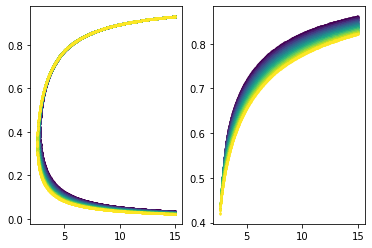

In [13]:
color_idx = np.linspace(0,1,len(ms))
color = plt.cm.viridis(color_idx)
for i,m in enumerate(ms):
    KF,RF,KB,RB = draw_case12_KR(m)
    plt.subplot(121)
    plt.scatter(KB,RB,color = color[i],s=1)
    plt.subplot(122)
    plt.scatter(KF,RF,color = color[i],s=1)
    
    

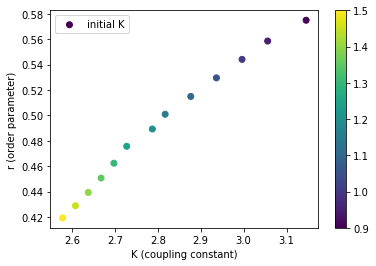

In [16]:
plt.scatter(*S,c=ms,label = 'initial K')
# plt.scatter(*S2,c=ms,label = 'initial K')
plt.legend()
plt.xlabel('K (coupling constant)')
plt.ylabel('r (order parameter)')
plt.colorbar()

In [35]:
N = 5000
theta_init, omega_init, Kc = Quantile_Lorentzian(N, 0, 1, seed=12)
dtheta_init = np.zeros(N)
theta_init = np.zeros(N)
t_end = 800
dt = 0.1
@timing
def Check_rk4_dt(K,m):
    theta_s, dtheta_s, omega, rs, t = Sol_Kuramoto_mf(N,K,m,(0, t_end),dt=dt,
                p_theta=theta_init,
                p_dtheta=dtheta_init,
                p_omega=omega_init,
                distribution="Normal",)
    return t, rs
func2 = np.vectorize(Check_rk4_dt)

In [32]:
len(S[0])

13

In [37]:
AS=[Check_rk4_dt(K,m) for K,m in zip(S2[0],ms)]
Slack_Notification()
# AS=AS[:10]+ [Check_rk4_dt(K,m) for K,m in zip(S[0][10:15],ms[10:15])]

func:'Check_rk4_dt' args:[(2.784684684684685, 0.9), {}] took: 30.3261 sec
func:'Check_rk4_dt' args:[(2.7548548548548553, 0.9500000000000001), {}] took: 30.4155 sec
func:'Check_rk4_dt' args:[(2.725025025025025, 1.0), {}] took: 30.5114 sec
func:'Check_rk4_dt' args:[(2.6951951951951956, 1.0500000000000003), {}] took: 30.8750 sec
func:'Check_rk4_dt' args:[(2.6802802802802805, 1.1), {}] took: 31.1602 sec
func:'Check_rk4_dt' args:[(2.650450450450451, 1.1500000000000004), {}] took: 31.3651 sec
func:'Check_rk4_dt' args:[(2.635535535535536, 1.2000000000000002), {}] took: 31.3891 sec
func:'Check_rk4_dt' args:[(2.605705705705706, 1.2500000000000004), {}] took: 31.5130 sec
func:'Check_rk4_dt' args:[(2.590790790790791, 1.3000000000000003), {}] took: 31.8625 sec
func:'Check_rk4_dt' args:[(2.575875875875876, 1.3500000000000005), {}] took: 31.8739 sec
func:'Check_rk4_dt' args:[(2.560960960960961, 1.4000000000000004), {}] took: 31.7466 sec
func:'Check_rk4_dt' args:[(2.546046046046046, 1.450000000000000

In [24]:
def make_sec_mean(rs,sec,dt,start,end):
    interval = int(sec/dt)
    len_rs = len(rs)
    partition = len_rs//interval
    make_partition = lambda x: rs[x*interval:x*interval+interval]
    PART = np.arange(partition)
    rss = [make_partition(x) for x in PART]
    mean_rss = list(map(np.mean,rss))
    mean_times = PART*sec
    start_idx, end_idx =np.searchsorted(mean_times,[start,end])
    return mean_times[start_idx:end_idx], mean_rss[start_idx:end_idx]

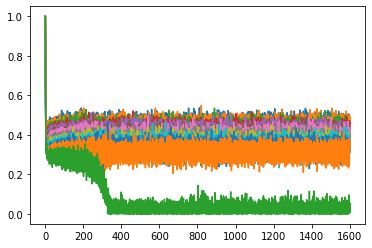

In [25]:
for i,m in enumerate(ms[:14]):
    plt.plot(*AS[i],label=f'm={m}')

In [28]:
S[1]

array([0.57487176, 0.55852139, 0.54407902, 0.52952532, 0.51489796,
       0.50089049, 0.48927341, 0.47566285, 0.46236086, 0.45066726,
       0.43932443, 0.42888445, 0.41929735])

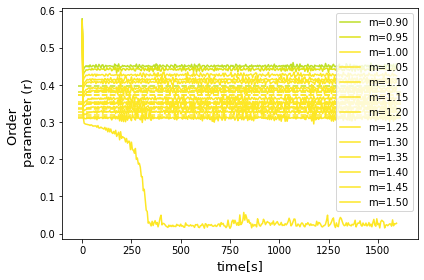

In [33]:
show_s = 0
show_e = 800
mean_time = 5
color_idx = np.linspace(0,1,len(AS))
color = plt.cm.viridis(ms[:14])
for i,((t,r),m)  in enumerate(zip(AS,ms)):
    plt.plot(*make_sec_mean(r,mean_time,dt,show_s,show_e),color = color[i],label = f'm={m:.02f}')
    plt.hlines(S2[1][i],show_s-20,show_e+20,color=color[i],linestyles='--')
    pass
plt.legend()
# plt.ylim(0.6)
plt.xlabel('time[s]',fontsize=13)
plt.ylabel('Order \n parameter (r)',fontsize=13)
# plt.title(f'm={m},N={N},K={K} \ndt={dt},'+r'$t_{end}$'+f'={t_end}s, '+r'$t_{interval}$'+f'={show_interval*dt:.02f} rtol={rtol}',fontsize=15)
# plt.title(f'm={m},N={N},K={K} \ndt={dt},'+r'$t_{end}$'+f'={t_end}s, '+r'$t_{interval}$'+f'={mean_time:.02f}',fontsize=15)
plt.tight_layout()
# plt.savefig(DF+f'{show_s,show_e}, m={m}, N={N},dt={dt},'+'RK4 + solve_ivp + rtol'+r't_end'+f'={t_end}s, rtol = {rtol}.png',dpi=400)